# First import the necessary library

In [1]:
from onset_functions import *
import onset_widgets as w

# Choose the spacecraft, sensor, view direction and particle species:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

# Set the path to your data folder:

In [4]:
# Path for the downloaded data
data_path = f"{os.getcwd()}"

# Confirm that the input is correct (needs to be run):

In [11]:
w.confirm_input(event_date, data_path, plot_path)

You've chosen the following options:
Spacecraft: STEREO-B
Sensor: SEPT
Species: protons
Viewing: sun
Event_date: 20210720
Data_path: /home/chospa/Documents/Github/SPOT
Plot_path: /home/chospa/Documents/Github/SPOT


# Choose time range for data loading, and create the Event object:

In [5]:
# Format of date: year, month, day
startdate = datetime.date(2021, 7, 20)
enddate = datetime.date(2021, 7, 21)

# Get event data:
event_onset = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

# Set the averaging period and background start and length in hours (e.g. 3, 8.1)

In [6]:
# Use pandas-compatible resampling period string, e.g. '10min' or '30s'
# Leave to None to not resample data
averaging = None #"2min"

# Set the time range for what is considered the background preceding the event:
# Format of datetime: year, month, day, hour, minute, second
background_range = (datetime.datetime(2021, 7, 20, 1, 0, 0), 
                    datetime.datetime(2021, 7, 20, 11, 0, 0))

# Set the channel(s) to plot:
channels = 2

# Set the time range for the plot:
plot_range = [datetime.datetime(2021, 7, 20, 0),datetime.datetime(2021, 7, 21, 23)]

# Run the cell to produce a plot

##### >Energy channels< #####
0.0348 - 0.0380 MeV
#############################

##### >Flux peak< #####
                                        flux
Time                                        
2021-07-20 04:43:50.462589568  121359.226562
2021-07-20 11:12:14.501903488  121359.226562
2021-07-20 18:18:46.545077504  121359.226562
2021-07-21 05:05:20.610523136  121359.226562
#######################

##### >Onset time< #####
NaT
########################

##### >Mean of background intensity< #####
5326.469
##########################################

##### >Std of background intensity< #####
12769.014
#########################################

##### >Particle species< #####
electrons
##############################



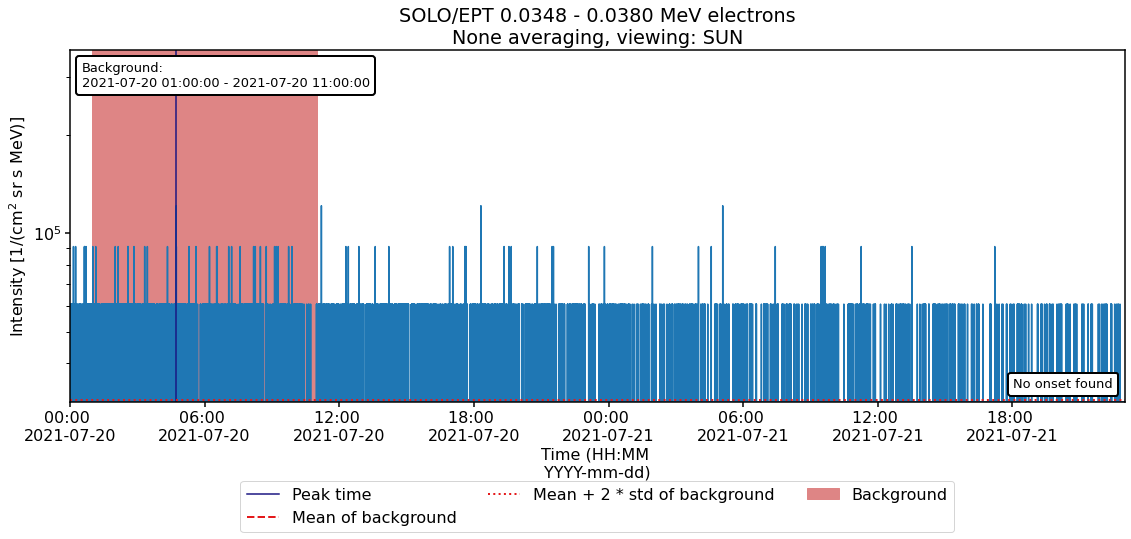

In [8]:
flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = event_onset.analyse(viewing=w.view_drop.value, background_range=background_range, channels=channels,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]
output = event_onset.output

# output is a dictionary, that contains 'flux_series', 'onset_stats', 'onset_found', 'onset', 'peak_flux', 'peak_time', 'fig' and 'bg_mean'

In [9]:
print(f"Onset: {output['onset']}")
print(f"Peak flux: {output['peak_flux']:.2e}")
print(f"Peak time: {output['peak_time']}")
print(f"Bg mean: {output['bg_mean']:.2e}")

Onset: NaT
Peak flux: 1.21e+05
Peak time: 2021-07-20 04:43:50.462589568
Bg mean: 5.33e+03


# Saving figures

In [10]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Date of the event as an integer YYYYMMDD (used for generating the default figure name)
event_date = 20210720

# Use a pre-generated name for the file:
file_name = f"{w.plot_path}{os.sep}{w.spacecraft_drop.value}_{w.sensor_drop.value}_{w.species_drop.value}_{event_date}_{averaging}.png"

# Or type your own here:
# file_name = ""

AttributeError: module 'onset_widgets' has no attribute 'input_dict'

In [19]:
# Check that the name is right
print(file_name)

/home/chospa/Documents/Github/SPOT/sta_SEPT_p_20210720_5min.png


In [17]:
#Save maximum peak flux plot
fig.savefig(file_name, facecolor= 'white', transparent=False)